In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Informations sur les fichiers CSV
Les fichiers CSV sont basés sur le nettoyage via la base de donnée "base_45_78". Nous avons créé une view sur laquelle les deux fichiers utilisés ici sont issus.

# Création graphique linéaire
distribution des évènements protestataires en Suisse de 1967 à 1978.
Nous allons regrouper tous les évènements politiques sur la voie publique ensemble pour faire une catégorie "évènements sur la voie publique". C'est-à-dire que les catégorie : démonstration publique (aucune info sur l'autorisation), démonstration publique (autorisée), démonstration publique (non-autorisée) et manifestation de rue sont regroupées.
Nous allons effectuer le même regroupement pour les grèves: Grève classique (moins d'un jour) et Grève classique (plus d'un jour et travailleurs contre patronat) seront réunies sous la catégorie "Grèves"

Toutes les catégories regroupées sont celles de la recherche " Politische Aktivierungsereignisse in der Schweiz in den Jahren zwischen 1945 bis 1978"

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_30087/1678162567.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = filtered_df.groupby('ajahr').apply(lambda x: pd.Series({


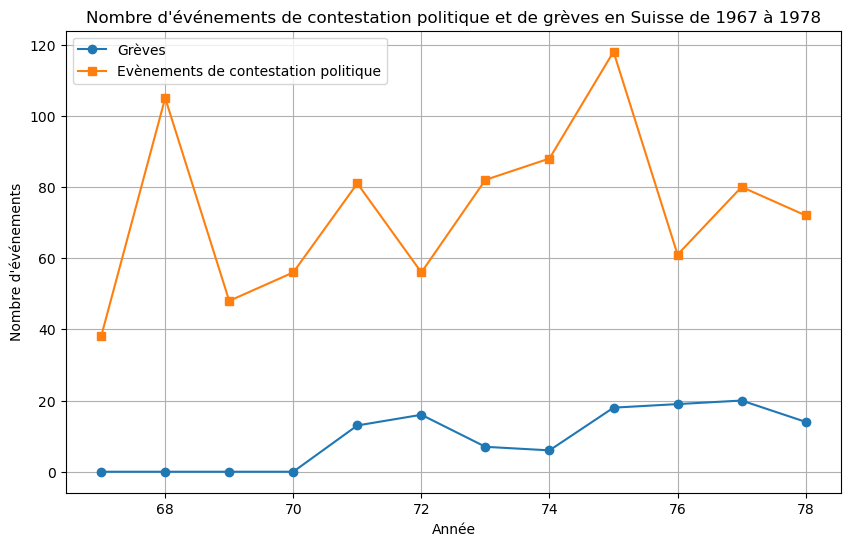

In [5]:
df = pd.read_csv('../CSV/analyse_68_78_manif_greve.csv')
# Convertir la colonne 'ajahr' en entiers pour éviter les problèmes de filtrage
df['ajahr'] = df['ajahr'].fillna(0).astype(int)

# Filtrer les années entre 67 et 78 inclus
filtered_df = df[(df['ajahr'] >= 67) & (df['ajahr'] <= 78)]

# Groupes d'intérêt pour fk_forme
group1 = [21, 22, 23, 24, 25]
group2 = [32, 33]

# Créer des agrégations pour chaque groupe
summary = filtered_df.groupby('ajahr').apply(lambda x: pd.Series({
    'Evenements_contestation_politique': x.loc[x['fk_forme'].isin(group1), 'nombre_evenements'].sum(),
    'Greves': x.loc[x['fk_forme'].isin(group2), 'nombre_evenements'].sum()
})).reset_index()


# Créer le graphique
plt.figure(figsize=(10, 6))  # Taille du graphique

# Tracer les deux courbes
plt.plot(summary['ajahr'], summary['Greves'], label='Grèves', marker='o')
plt.plot(summary['ajahr'], summary['Evenements_contestation_politique'], label='Evènements de contestation politique', marker='s')

# Ajouter des légendes et des titres
plt.xlabel("Année")
plt.ylabel("Nombre d'événements")
plt.title("Nombre d'événements de contestation politique et de grèves en Suisse de 1967 à 1978")
plt.legend()

# plt.savefig('distribution_evenements_67_78.png', dpi=300, bbox_inches='tight')

# Afficher la grille
plt.grid(True)
plt.show()



# Création d'un diagramme à barres
distribution des évènements regroupés par tranche de 5 ans de 1945 à 1978

In [3]:
df = pd.read_csv('CSV/analyse_distribution_ev.csv')

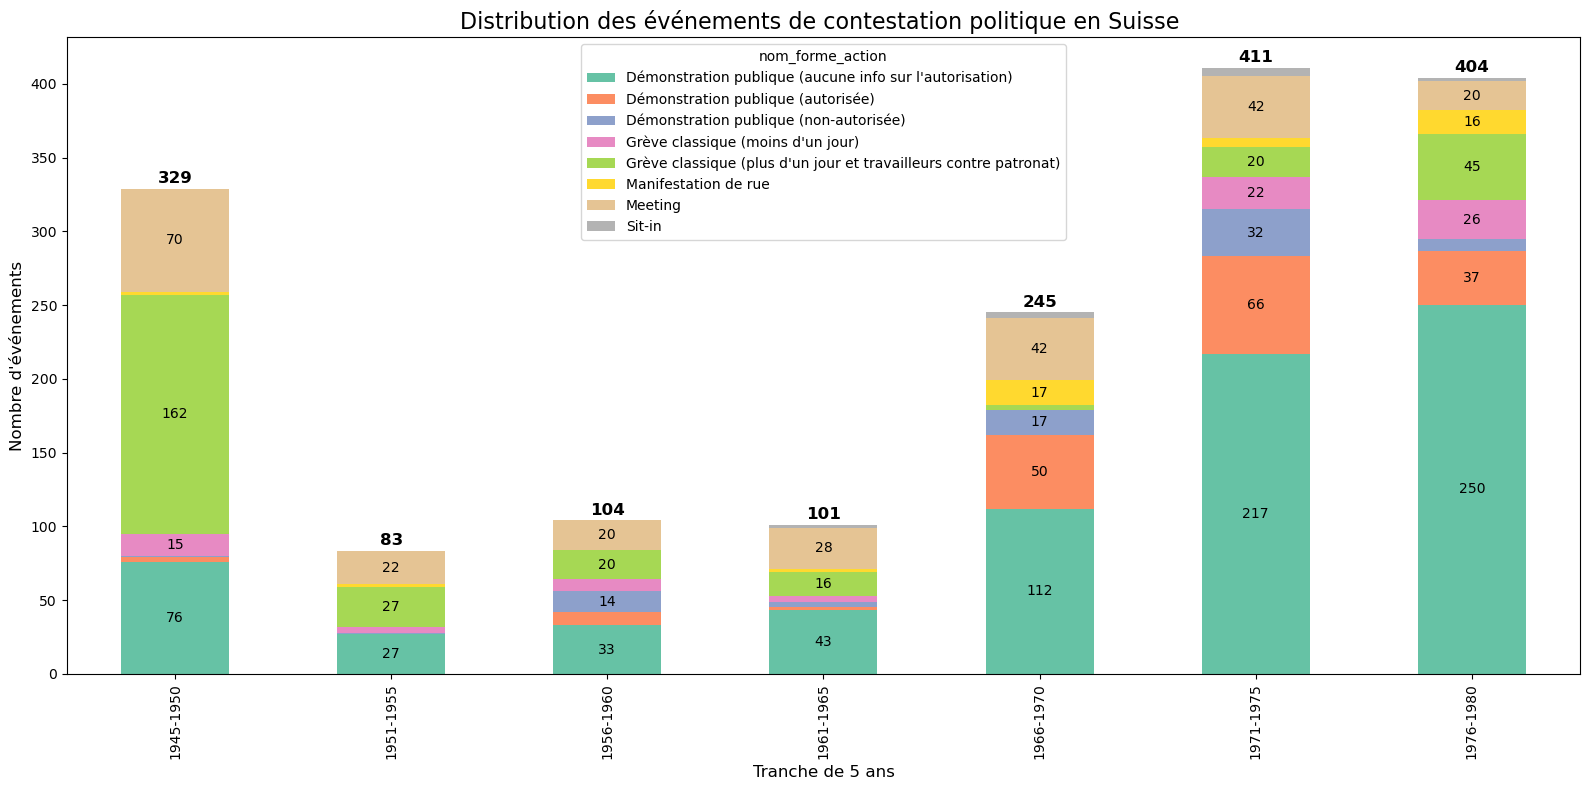

In [4]:


# Créer une colonne 'tranche_5_ans' pour regrouper les années par tranches de 5 ans
df['tranche_5_ans'] = pd.cut(df['ajahr'], bins=range(45, 81, 5), right=False, labels=['1945-1950', '1951-1955', '1956-1960', '1961-1965', '1966-1970', '1971-1975', '1976-1980'])

# Créer une table pivotée avec les types d'événements en colonnes et les tranches de 5 ans en indices
df_pivot = df.pivot_table(index='tranche_5_ans', columns='nom_forme_action', values='nombre_evenements', aggfunc='sum', observed=False)

# Créer un graphique en barres empilées
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='Set2')

# Ajouter un titre et des labels
plt.title('Distribution des événements de contestation politique en Suisse ', fontsize=16)
plt.xlabel('Tranche de 5 ans', fontsize=12)
plt.ylabel('Nombre d\'événements', fontsize=12)

for p in ax.patches:
    height = p.get_height()  # Récupérer la hauteur de chaque segment
    if height >= 10:  # Vérifier si le nombre d'occurrences est au moins 10
        x = p.get_x() + p.get_width() / 2  # Calculer la position x
        y = p.get_y() + height / 2  # Calculer la position y
        ax.text(x, y, str(int(height)), ha='center', va='center', fontsize=10, color='black')

# Ajouter le total au-dessus de chaque barre
totals = df_pivot.sum(axis=1)  # Somme des événements par tranche

for i, total in enumerate(totals):
    # Positionner le texte juste au-dessus de chaque barre
    ax.text(i, total + 2, str(int(total)), ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
# plt.savefig('distribution_evenements_45_78.png', dpi=300, bbox_inches='tight')

# Afficher le graphique
plt.tight_layout()
plt.show()
